# Part I - These are the necessary Python packages for the assignment

In [57]:
# 0. Imports and Setup
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Part II - Functions

## (a) Description of the defined function

In [58]:
# 1. Get Sequences from FASTA File
## Here's the start of our Python script. Thanks for completing it for me! - Dr. X
## IMPORTANT: install BioPython so that this will work

"""
 This function reads a FASTA file of cytochrome-b DNA sequences and returns 
 a dictionary mapping the species names to their sequence data.
    
    Args:
    fasta_fn (string): Path to the FASTA file containing the sequence data.
    
    Returns:
    dictionary: A dictionary where keys are species names and values are sequence objects.
    """

def get_sequences_from_file(fasta_fn): # Define a fuction that reads the path to FASTA file as imput
    sequence_data_dict = {} # Initialize an empty dictionary to store the results
    for record in SeqIO.parse(fasta_fn, "fasta"): # SeqIO.parse is used to read over each sequence record in the FASTA file
        description = record.description.split() # Split the description line (i.e., the header)of the FASTA file
        species_name = description[1] + " " + description[2] # Extract the species name using the second and third elements of the description
        sequence_data_dict[species_name] = record.seq # Store the sequence in the dictionary under the species name key
    return(sequence_data_dict) # Return the dictionary containing the species names with their corresponding sequences 

## (b) Test to see if the fuction defined above works as expected

In [59]:
fasta_file = "penguins_cytb.fasta" # Specifies the filename or path of the FASTA file "penguins_cytb.fasta"
sequences = get_sequences_from_file(fasta_file)  #Calls the function and stores the result in the variable 'sequence'

print(sequences) # Print the dictionary of seqeunces to confirm 

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAAC

## (c) This function translates a nucleotide sequence to its corresponding amino acid sequence 

### Helpful reference: (https://decodingbiology.substack.com/p/introduction-to-python-for-bioinformatics)

In [60]:
# 2. String-translate function

def translate_function(string_nucleotides): 
    
    """
    Translates a DNA sequence using the Vertebrate Mitochondrial genetic code
    until a stop codon is encountered.

    Args:
        string_nucleotides (str): DNA sequence string (e.g., 'ATG...')

    Returns:
        str: Amino acid sequence when if finds the first stop codon.     
    """
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # Loads the translation codon table 
    aa_seq_string = "" # Makes an empty string to store the translated amino acid sequences 
    
    for i in range(0, len(string_nucleotides), 3): # Reads through DNA sequence 3 nucleotides at a time (i.e., condons)
        codon = string_nucleotides[i:i+3] # Reads the next codon in the DNA sequence
        if len(codon) != 3: # Checks to see if the codon is less than 3 bases (i.e., incomplete)
            break  # Exits the loop if an incomplete codon is found 
            
        if codon in mito_table.stop_codons: # Checkssif the codone is a stop codon
            break # Exits the loop if a stop codon is found

        # Translates codon using the forward_table
        aa = mito_table.forward_table.get(codon, 'X')  # 'X' for unknown codons
        aa_seq_string += aa # Adds the amino acid to the growing amino acid sequence

    return aa_seq_string # Returns the final amino acid sequence as a string

## (d) Test to see if the fuction defined above works as expected

In [61]:
dna_seq = "ATGAGCTGTCGACGAGTTCGCTGGGGGTACCTCGCTCGAGTCTGCGACGYC"

print(translate_function(dna_seq))

MSCRRVRWGYLARVCDX


## (e) Alternative function to translate a nucleotide sequence to its corresponding amino acid sequence

In [62]:
# 3. Alternative translation function

def translate_dna(sequence, table="Vertebrate Mitochondrial", to_stop=True):
    """
    Translates a DNA sequence into an amino acid sequence using Biopython's built-in utilities.

    Args:
        sequence (str): DNA sequence (e.g., 'ATGGCC...').
        table (str or int): Codon table name (default is vertebrate mitochondrial).
        to_stop (bool): If True, translation stops at the first stop codon.

    Returns:
        str: Translated amino acid sequence.
    """
    dna_seq = Seq(sequence.upper())  # Creates a Biopython Seq object from the input string

    protein = dna_seq.translate(table=table, to_stop=to_stop) # Translates the sequence using the designated codon table

    return str(protein) # Returns the final amino acid sequence as a string


## (f) Test to see if the fuction defined above works as expected using the same nucleotide sequence as above (V)

In [63]:
dna = "ATGAGCTGTCGACGAGTTCGCTGGGGGTACCTCGCTCGAGTCTGCGACGYC"
print(translate_dna(dna))

MSCRRVRWGYLARVCDX


## (g) Calculate the molecular weight of amino acid sequences 

In [64]:
# 4. Molecular weight function

def calculate_molecular_weight(amino_acid_sequence):
    """
    This function calculates the molecular weight of a specific amino acid sequence.
    
    Args:
    amino_acid_sequence (str): A string designating an amino acid sequence.
    
    Returns:
    float: The molecular weight of the amino acid sequence.
    """
    analysis = ProteinAnalysis(amino_acid_sequence)
    return analysis.molecular_weight()

## (h) Test to see if the fuction defined above works as expected

In [65]:
insulin_sequence = "GIVEQCCTSICSLYQLENYCNFVNQHLCGSHLVEALYLVCGERGFFYTPKT"
weight = calculate_molecular_weight(insulin_sequence)
print(f"Molecular weight of human insulin: {weight:.2f} Da")


Molecular weight of human insulin: 5795.60 Da


## (i)  Calculate the GC content (%) of DNA sequences

In [66]:
# 5. GC content analysis function

def calculate_gc_content(dna_sequence):
    """
    This function calculates the GC-content as a percentage of a specified DNA sequence.
    
    Args:
    dna_sequence (str): A string designating of a DNA sequence.
    
    Returns:
    float: The GC content as a percentage (%).
    """
    dna_sequence = dna_sequence.upper() # Converts all the DNA bases in sequence to uppercase 
    gc_count = dna_sequence.count('G') + dna_sequence.count('C') # Counts number of G's and C's in a DNA sequence 
    return (gc_count / len(dna_sequence)) * 100.0  # Returns GC content as %


## (j) Test to see if the fuction defined above works as expected

In [67]:
dna_seq = "AGCTTGATGCGTATCGGTAGCCTTAAGGTCCGATCGAACCTGTGGTTAGCTAGCTAGCTGGACTACGATTCGGATTAGGCTACCGTTCGGAAGCTAGCTAGCA"
gc_content = calculate_gc_content(dna_seq)
print(f"GC-content: {gc_content:.2f}%")

GC-content: 51.46%


# Part III - Main Part of the Script

## (a) Addition of two new columns

### Helpful reference: https://lanadominkovic.medium.com/bioinformatics-101-reading-fasta-files-using-biopython-501c390c6820

In [68]:
# 6.

def get_sequences_from_file(filename): # Defines a function that reads sequences from a FASTA file using Biopython's SeqIO
    return list(SeqIO.parse(filename, "fasta")) # Returns a list of Seq objects

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") # Reads the cytochrome b sequences for penguins from a FASTA file
penguins_df = pd.read_csv("penguins_mass.csv") # The file should include only the penguin body mass data
species_list = list(penguins_df.species) # Extracts the species colemn as a list

penguins_df['Molecular_Weight'] = 'NaN' # Adds a new molecular weight column with NaN values
penguins_df['GC_content'] = 'NaN' # Adds a new GC content column with NaN values

display(penguins_df) # Displays the DataFrame with the two newly added columns

,species,mass,Molecular_Weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


## (b) Calculating the molecular weight and GC content

In [69]:
# 7. 

# Builds a dictionary mapping the names of species to DNA sequences
seq_dict = {}
for record in cytb_seqs:
    description_parts = record.description.split()
    species_name = description_parts[1] + " " + description_parts[2]
    seq_dict[species_name] = str(record.seq)

# Iterates through the DataFrame rows
for i, row in penguins_df.iterrows():   # Corrects from 'penguins' to 'penguins_df'
    species = row["species"]            # Extracts species name
    seq = seq_dict.get(species)         # Gets sequence for the species

    if seq:  # If the sequence is found
        aa_seq = translate_dna (seq).replace("*", "")
        mol_weight = calculate_molecular_weight(aa_seq)
        GC_content = calculate_gc_content(seq)

        # Updates the DataFrame
        penguins_df.at[i, 'Molecular_Weight'] = mol_weight
        penguins_df.at[i, 'GC_content'] = GC_content

# Displays the updated DataFrame
penguins_df


,species,mass,Molecular_Weight,GC_content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.614,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.549,48.293963


## (c) Bar chart plot of adult body mass per species

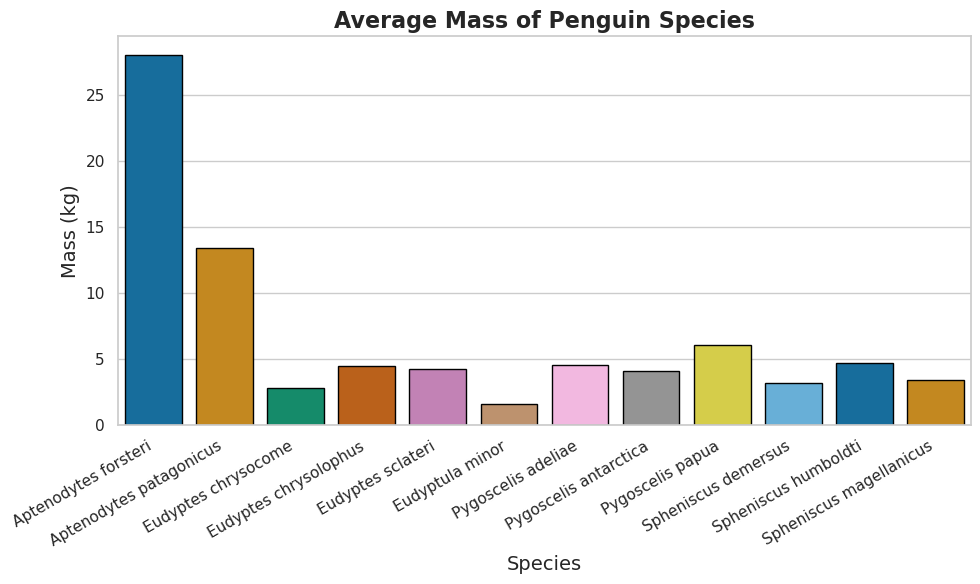

In [70]:
# 8. 

# Set seaborn style and colorblind friendly palette
sns.set(style="whitegrid")

# Create a unique color palette for each species
species = penguins_df['species'].unique()
palette = sns.color_palette("Set2", n_colors=len(species))

# Create the figure and size
plt.figure(figsize=(10, 6))

# Plot the bar chart
sns.barplot(
    data=penguins_df,
    x='species',
    y='mass',
    hue='species',         
    palette="colorblind",  # Colorblind friendly palette 
    errorbar=None,         
    legend=False,         
    edgecolor='black'
)

# Formatting
plt.title("Average Mass of Penguin Species", fontsize=16, fontweight='bold')
plt.xlabel("Species", fontsize=14)
plt.ylabel("Mass (kg)", fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


#### Questions 1 & 2. The smallest penguin species is Eudyptula minor, also known as the little penguin, the fairy penguin, the little blue penguin, or simply the blue penguin (https://en.wikipedia.org/wiki/Little_penguin). The little blue penguins inhabit the coastal areas of Southern Australia and New Zealand (https://ebird.org/species/litpen1).

## (d)  Graph of molecular weight vs. GC content

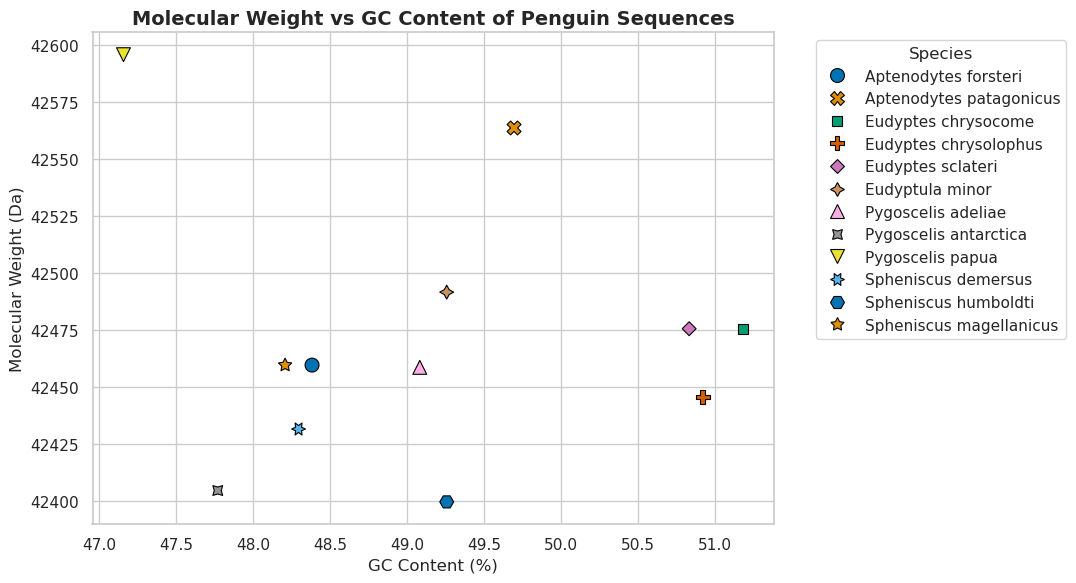

In [71]:
# 9.

# Set seaborn style and colorblind friendly palette
sns.set(style="whitegrid")

# Create the figure and size
plt.figure(figsize=(8, 6))

# Plot the scatter plot
sns.scatterplot(
    data=penguins_df,
    x="GC_content",  
    y="Molecular_Weight",
    hue="species",        
    style="species",       # Different marker styles per species
    palette="colorblind",  # Colorblind friendly palette
    s=100,                 # Size of scatter dots
    edgecolor='black'      
)

# Add labels and title
plt.title("Molecular Weight vs GC Content of Penguin Sequences", fontsize=14, fontweight='bold')
plt.xlabel("GC Content (%)", fontsize=12)
plt.ylabel("Molecular Weight (Da)", fontsize=12)

# Improve layout
plt.tight_layout()
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')  # move the legend outside
plt.show()


## (e) Save the new DataFrame

In [72]:
# 10. Save the new DataFrame to a file called "penguins_mass_cytb.csv"

penguins_df.to_csv("penguins_mass_cytb.csv", index=False)

# Part IV - BONUS

## Pairplot – Scatterplot matrix to explore correlations between all numeric variables

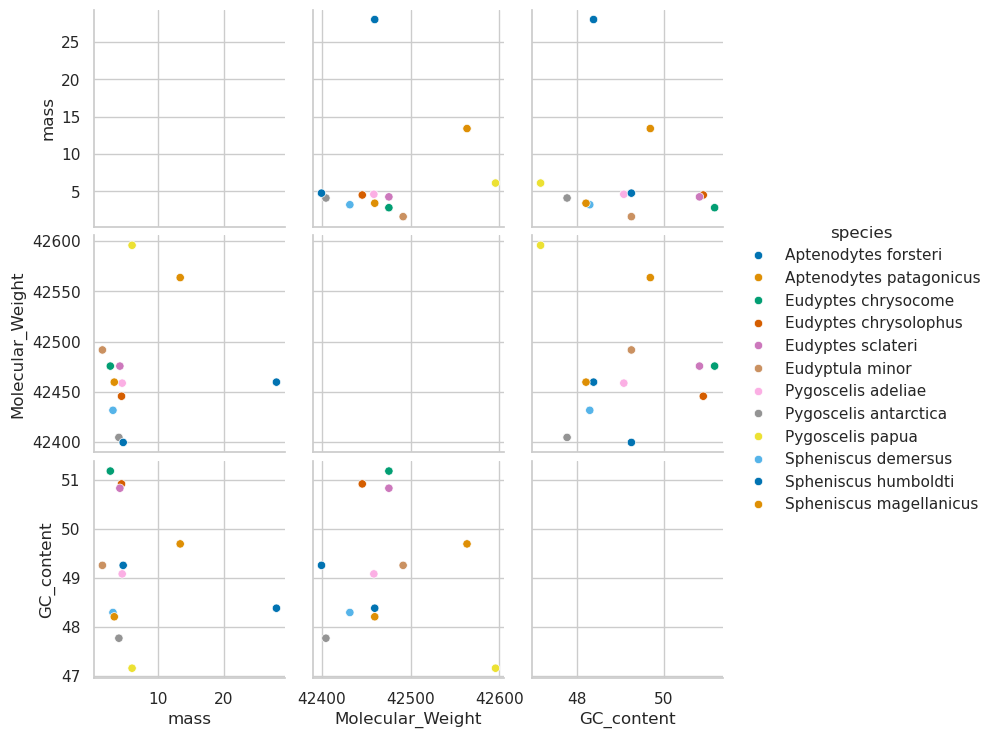

In [73]:
# 11. 

sns.pairplot(penguins_df, hue='species', palette='colorblind')
